In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
import psycopg2
import json
from dotenv import dotenv_values

# Trying a Map with Matplotlib

In [3]:
df_map_bundeslaender = gpd.read_file('data/bundeslaender.shp')

In [4]:
df_map_bundeslaender

,USE,RS,RS_ALT,GEN,SHAPE_LENG,SHAPE_AREA,geometry
0,2,02,020000000000,Hamburg,1.752538e+05,7.605398e+08,"MULTIPOLYGON (((10.19114 53.72299, 10.18210 53..."
1,2,03,030000000000,Niedersachsen,2.016496e+06,4.771641e+10,"MULTIPOLYGON (((8.68962 53.87999, 8.69297 53.8..."
2,2,04,040000000000,Bremen,1.549716e+05,4.054809e+08,"MULTIPOLYGON (((8.52976 53.21640, 8.55399 53.2..."
3,2,05,050000000000,Nordrhein-Westfalen,1.352108e+06,3.404727e+10,"POLYGON ((8.66673 52.52149, 8.70289 52.50053, ..."
4,2,06,060000000000,Hessen,1.105093e+06,2.109232e+10,"POLYGON ((9.50560 51.62777, 9.50842 51.62712, ..."
5,2,07,070000000000,Rheinland-Pfalz,9.106504e+05,1.983491e+10,"POLYGON ((7.84657 50.87861, 7.85901 50.87733, ..."
6,2,08,080000000000,Baden-Württemberg,1.298892e+06,3.580140e+10,"MULTIPOLYGON (((9.64634 49.77782, 9.63806 49.7..."
7,2,09,090000000000,Bayern,2.046039e+06,7.055007e+10,"POLYGON ((10.47207 47.56964, 10.47319 47.57081..."
8,2,10,100000000000,Saarland,2.829108e+05,2.578542e+09,"POLYGON ((7.06853 49.62349, 7.08023 49.61196, ..."
9,2,11,110000000000,Berlin,1.807512e+05,8.864801e+08,"POLYGON ((13.61192 52.54332, 13.62461 52.53797..."


In [5]:
df_map_bundeslaender.rename(columns={'GEN':'bundesland'}, inplace=True)
df_map_bundeslaender

,USE,RS,RS_ALT,bundesland,SHAPE_LENG,SHAPE_AREA,geometry
0,2,02,020000000000,Hamburg,1.752538e+05,7.605398e+08,"MULTIPOLYGON (((10.19114 53.72299, 10.18210 53..."
1,2,03,030000000000,Niedersachsen,2.016496e+06,4.771641e+10,"MULTIPOLYGON (((8.68962 53.87999, 8.69297 53.8..."
2,2,04,040000000000,Bremen,1.549716e+05,4.054809e+08,"MULTIPOLYGON (((8.52976 53.21640, 8.55399 53.2..."
3,2,05,050000000000,Nordrhein-Westfalen,1.352108e+06,3.404727e+10,"POLYGON ((8.66673 52.52149, 8.70289 52.50053, ..."
4,2,06,060000000000,Hessen,1.105093e+06,2.109232e+10,"POLYGON ((9.50560 51.62777, 9.50842 51.62712, ..."
5,2,07,070000000000,Rheinland-Pfalz,9.106504e+05,1.983491e+10,"POLYGON ((7.84657 50.87861, 7.85901 50.87733, ..."
6,2,08,080000000000,Baden-Württemberg,1.298892e+06,3.580140e+10,"MULTIPOLYGON (((9.64634 49.77782, 9.63806 49.7..."
7,2,09,090000000000,Bayern,2.046039e+06,7.055007e+10,"POLYGON ((10.47207 47.56964, 10.47319 47.57081..."
8,2,10,100000000000,Saarland,2.829108e+05,2.578542e+09,"POLYGON ((7.06853 49.62349, 7.08023 49.61196, ..."
9,2,11,110000000000,Berlin,1.807512e+05,8.864801e+08,"POLYGON ((13.61192 52.54332, 13.62461 52.53797..."


(5.4074115870112625, 15.49633056180143, 46.88101170798465, 55.446725320170714)

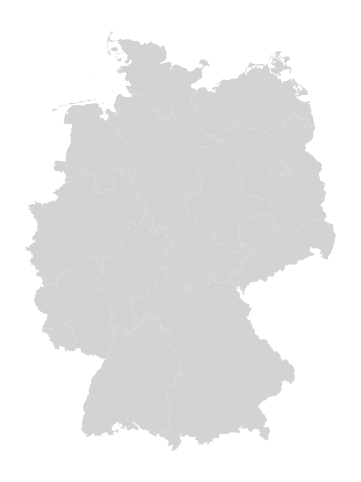

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
df_map_bundeslaender.plot(ax=ax, color='lightgray')
plt.axis('off')

In [7]:
# Get db credentials from .env file
cred = dotenv_values('.env')

In [8]:
def get_dataframe(query):
    '''
    Make a query in the database and
    return the result as a pandas dataframe.
    '''
    # use .env credentials instead of streamlit secret
    con = psycopg2.connect(
        host = cred['host'],
        port = cred['port'],
        database = cred['database'],
        user = cred['user'],
        password = cred['password']
    )
    cur = con.cursor()
    cur.execute(query)
    result = cur.fetchall()
    cur.close()
    con.close()
    return pd.DataFrame(result)

In [9]:
query = '''
    select schluessel, straftat, bundesland, anzahl_erfasste_faelle, year
    from public.laender_grund_2022_until_2018
    where schluessel = '------'
    and bundesland != 'Bundesrepublik Deutschland';
'''
df_crimes_bundeslaender = get_dataframe(query)
df_crimes_bundeslaender

,0,1,2,3,4
0,------,Straftaten insgesamt,Baden-Württemberg,550008,2022
1,------,Straftaten insgesamt,Bayern,619089,2022
2,------,Straftaten insgesamt,Berlin,519822,2022
3,------,Straftaten insgesamt,Brandenburg,170204,2022
4,------,Straftaten insgesamt,Bremen,79713,2022
...,...,...,...,...,...
75,------,Straftaten insgesamt,Saarland,70873,2018
76,------,Straftaten insgesamt,Sachsen,278796,2018
77,------,Straftaten insgesamt,Sachsen-Anhalt,175625,2018
78,------,Straftaten insgesamt,Schleswig-Holstein,186894,2018


In [10]:
df_crimes_bundeslaender.columns = ['schluessel', 'straftat', 'bundesland', 'anzahl_erfasste_faelle', 'year']
df_crimes_bundeslaender

,schluessel,straftat,bundesland,anzahl_erfasste_faelle,year
0,------,Straftaten insgesamt,Baden-Württemberg,550008,2022
1,------,Straftaten insgesamt,Bayern,619089,2022
2,------,Straftaten insgesamt,Berlin,519822,2022
3,------,Straftaten insgesamt,Brandenburg,170204,2022
4,------,Straftaten insgesamt,Bremen,79713,2022
...,...,...,...,...,...
75,------,Straftaten insgesamt,Saarland,70873,2018
76,------,Straftaten insgesamt,Sachsen,278796,2018
77,------,Straftaten insgesamt,Sachsen-Anhalt,175625,2018
78,------,Straftaten insgesamt,Schleswig-Holstein,186894,2018


In [11]:
df_map_crimes_bundeslaender = df_map_bundeslaender.merge(df_crimes_bundeslaender, on='bundesland')
df_map_crimes_bundeslaender

,USE,RS,RS_ALT,bundesland,SHAPE_LENG,SHAPE_AREA,geometry,schluessel,straftat,anzahl_erfasste_faelle,year
0,2,02,020000000000,Hamburg,1.752538e+05,7.605398e+08,"MULTIPOLYGON (((10.19114 53.72299, 10.18210 53...",------,Straftaten insgesamt,211239,2022
1,2,02,020000000000,Hamburg,1.752538e+05,7.605398e+08,"MULTIPOLYGON (((10.19114 53.72299, 10.18210 53...",------,Straftaten insgesamt,186403,2021
2,2,02,020000000000,Hamburg,1.752538e+05,7.605398e+08,"MULTIPOLYGON (((10.19114 53.72299, 10.18210 53...",------,Straftaten insgesamt,203526,2020
3,2,02,020000000000,Hamburg,1.752538e+05,7.605398e+08,"MULTIPOLYGON (((10.19114 53.72299, 10.18210 53...",------,Straftaten insgesamt,210832,2019
4,2,02,020000000000,Hamburg,1.752538e+05,7.605398e+08,"MULTIPOLYGON (((10.19114 53.72299, 10.18210 53...",------,Straftaten insgesamt,218594,2018
...,...,...,...,...,...,...,...,...,...,...,...
75,2,01,010000000000,Schleswig-Holstein,1.217256e+06,1.585743e+10,"MULTIPOLYGON (((8.44703 55.05034, 8.46057 55.0...",------,Straftaten insgesamt,221183,2022
76,2,01,010000000000,Schleswig-Holstein,1.217256e+06,1.585743e+10,"MULTIPOLYGON (((8.44703 55.05034, 8.46057 55.0...",------,Straftaten insgesamt,176893,2021
77,2,01,010000000000,Schleswig-Holstein,1.217256e+06,1.585743e+10,"MULTIPOLYGON (((8.44703 55.05034, 8.46057 55.0...",------,Straftaten insgesamt,173929,2020
78,2,01,010000000000,Schleswig-Holstein,1.217256e+06,1.585743e+10,"MULTIPOLYGON (((8.44703 55.05034, 8.46057 55.0...",------,Straftaten insgesamt,183445,2019


Text(0.5, 1.0, 'Crimes in Germany - 2022')

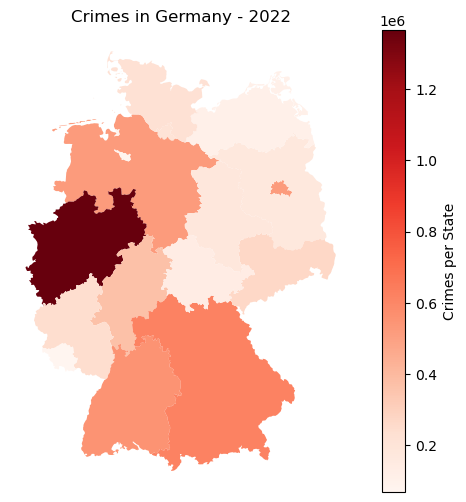

In [87]:
year = '2022'
df_tmp = df_map_crimes_bundeslaender[df_map_crimes_bundeslaender['year'] == year]
fig, ax = plt.subplots(figsize=(8,6))
df_tmp.plot(
    column='anzahl_erfasste_faelle', 
    ax=ax, 
    legend=True,
    legend_kwds={"label": "Crimes per State", "orientation": "vertical"},
    cmap='Reds'
)
plt.axis('off')
plt.ticklabel_format(useOffset=False, style='plain')
plt.title(f'Crimes in Germany - {year}')

## Fazit
Works excellent
But Plot is not interactive, no hovering information, no possibility to zoom, etc.

# Trying some stuff with Plotly

## Some simple interactive charts

### Bar Chart

In [90]:
query = '''
    select schluessel, straftat, bundesland, anzahl_erfasste_faelle, year
    from public.laender_grund_2022_until_2018
    where schluessel = '------'
    and bundesland != 'Bundesrepublik Deutschland'
    and year = '2022';
'''
df = get_dataframe(query)
df.columns = ['schluessel', 'straftat', 'bundesland', 'anzahl_erfasste_faelle', 'year']
df

,schluessel,straftat,bundesland,anzahl_erfasste_faelle,year
0,------,Straftaten insgesamt,Baden-Württemberg,550008,2022
1,------,Straftaten insgesamt,Bayern,619089,2022
2,------,Straftaten insgesamt,Berlin,519822,2022
3,------,Straftaten insgesamt,Brandenburg,170204,2022
4,------,Straftaten insgesamt,Bremen,79713,2022
5,------,Straftaten insgesamt,Hamburg,211239,2022
6,------,Straftaten insgesamt,Hessen,368579,2022
7,------,Straftaten insgesamt,Mecklenburg-Vorpommern,106559,2022
8,------,Straftaten insgesamt,Niedersachsen,523996,2022
9,------,Straftaten insgesamt,Nordrhein-Westfalen,1366601,2022


In [114]:
fig = px.bar(
    df,
    x = df['bundesland'],
    y = df['anzahl_erfasste_faelle'],
    hover_name = 'bundesland',
    hover_data = {'bundesland':False},
    labels = {'bundesland':'State', 'anzahl_erfasste_faelle':'Crimes'},
    title = 'Crimes per State in 2022'
)
fig.update_xaxes(tickangle=-90)
fig.show()

### Line Chart

In [115]:
fig = px.line(
    df,
    x = df['bundesland'],
    y = df['anzahl_erfasste_faelle'],
    hover_name = 'bundesland',
    hover_data = {'bundesland':False},
    labels = {'bundesland':'State', 'anzahl_erfasste_faelle':'Crimes'},
    title = 'Crimes per State in 2022'
)
fig.update_xaxes(tickangle=-90)
fig.show()

### Pie Chart

In [119]:
fig = px.pie(
    df,
    names = 'bundesland',
    values = 'anzahl_erfasste_faelle',
    hover_name = 'bundesland',
    hover_data = {'bundesland':False},
    labels = {'bundesland':'State', 'anzahl_erfasste_faelle':'Crimes'},
    title = 'Crimes per State in 2022'
)
fig.update_xaxes(tickangle=-90)
fig.show()

### Try a Choropleth Map from GeoJSON File

In [122]:
df.head(1)

,schluessel,straftat,bundesland,anzahl_erfasste_faelle,year
0,------,Straftaten insgesamt,Baden-Württemberg,550008,2022


In [161]:
with open('data/bundeslaender_polygons.json') as response:
    geo_data = json.load(response)
geo_data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': 0,
   'properties': {'ID_0': 86,
    'ISO': 'DEU',
    'NAME_0': 'Germany',
    'ID_1': 1,
    'NAME_1': 'Baden-Württemberg',
    'NL_NAME_1': None,
    'VARNAME_1': None,
    'TYPE_1': 'Land',
    'ENGTYPE_1': 'State'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[9.650460243225211, 49.7763404846192],
       [9.656839370727539, 49.761451721191406],
       [9.640399932861612, 49.75014114379883],
       [9.652028083801326, 49.742759704589844],
       [9.646539688110352, 49.738990783691406],
       [9.652549743652287, 49.73157119750988],
       [9.64107894897461, 49.735221862793196],
       [9.64140987396246, 49.727748870849894],
       [9.630180358886776, 49.727668762206974],
       [9.647407531738224, 49.720340728759766],
       [9.636459350585994, 49.71279907226557],
       [9.631500244140682, 49.69784164428711],
       [9.637469291687069, 49.69042205810558],
       [9.671889305114973, 49.683181

In [162]:
geo_data['features'][0]['properties']['NAME_1']

'Baden-Württemberg'

In [159]:
fig = px.choropleth(
    df, # Crime data
    locations = 'bundesland', #column in dataframe
    geojson = geo_data, #geodata in geoJSON format
    featureidkey = 'properties.NAME_1', #key that merges to dataframe
    color = 'anzahl_erfasste_faelle', #in dataframe
    labels = {'bundesland':'State', 'anzahl_erfasste_faelle':'Crimes'},
    hover_name = 'bundesland',
    hover_data = {'bundesland':False},
    title = 'Crime in Germany',
)
fig.update_geos(fitbounds='locations', visible=False)
#fitbounds: zoomt in die Karte, 
#visible:False blendet alles andere von der Karte aus
fig.show()

### Result  
Great, the first time that it works 😀  
ToDo's:  
- Make map bigger
- Change colors